In [ ]:
glove.6B.100d.txt

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv('analysis_dataset.csv')

# Feature extraction: TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(df['analysis_text']).toarray()

# Label encoding
labels = pd.get_dummies(df['task'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)

# Define a simple neural network model for classification
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(labels.shape[1], activation='softmax')  # Output layer nodes equal to number of tasks
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

2024-03-18 20:01:41.475821: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
3/3 [==============================] - 1s 88ms/step - loss: 2.5657 - accuracy: 0.1000 - val_loss: 2.5339 - val_accuracy: 0.3000
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 2.4732 - accuracy: 0.8000 - val_loss: 2.5114 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 2.3822 - accuracy: 0.9222 - val_loss: 2.4735 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 2.2617 - accuracy: 0.9556 - val_loss: 2.4163 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 2.1110 - accuracy: 0.9667 - val_loss: 2.3441 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 1.9156 - accuracy: 0.9778 - val_loss: 2.2382 - val_accuracy: 0.6000
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 1.6775 - accuracy: 0.9889 - val_loss: 2.1173 - val_accuracy: 0.7000
Epoch 8/100
3/3 [===

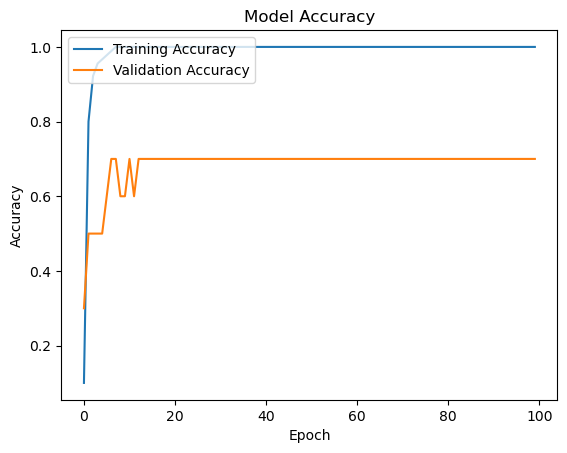

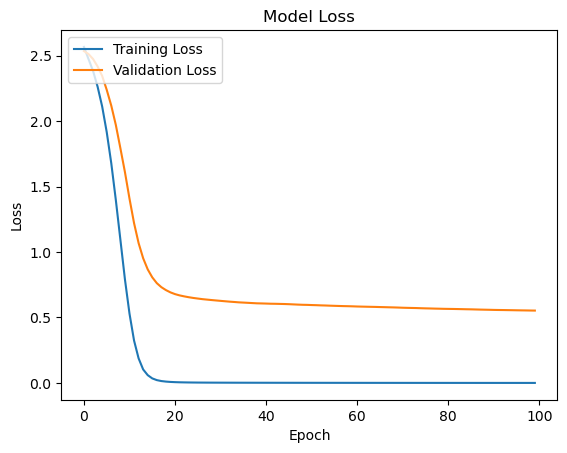

In [2]:
import matplotlib.pyplot as plt


# Plotting training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()